In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

%matplotlib inline

# Airbnb EDA
- Import dataset
- EDA to visualize data and observe structure
- Decision tree
- Predict target

In [2]:
data = pd.read_csv('data/data.csv')



In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
train, test = train_test_split(data, test_size = 0.15)

In [8]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 41560; Test size: 7335


In [9]:
#Tikriname kaip atsiliepimų skč. priklauso nuo kainos

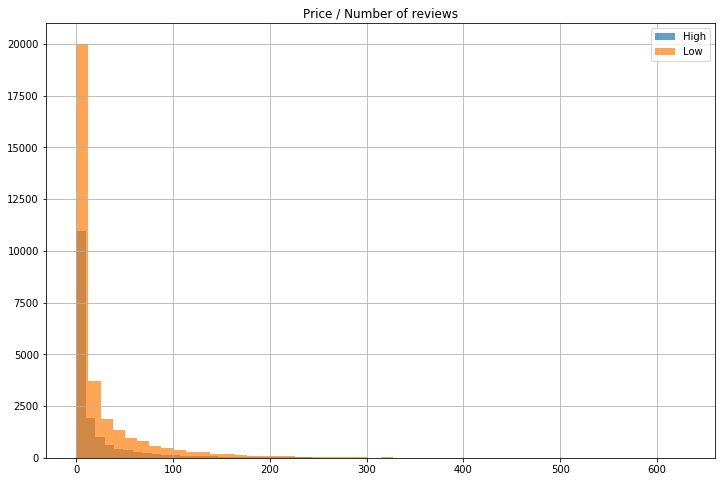

In [10]:
high_price = data[data['price'] >= 150]['number_of_reviews']
low_price = data[data['price'] < 150]['number_of_reviews']

fig = plt.figure(figsize=(12,8))
plt.title("Price / Number of reviews")
high_price.hist(alpha = 0.7, bins = 50, label = 'High')
low_price.hist(alpha = 0.7, bins = 50, label = 'Low')
plt.legend(loc = "upper right")


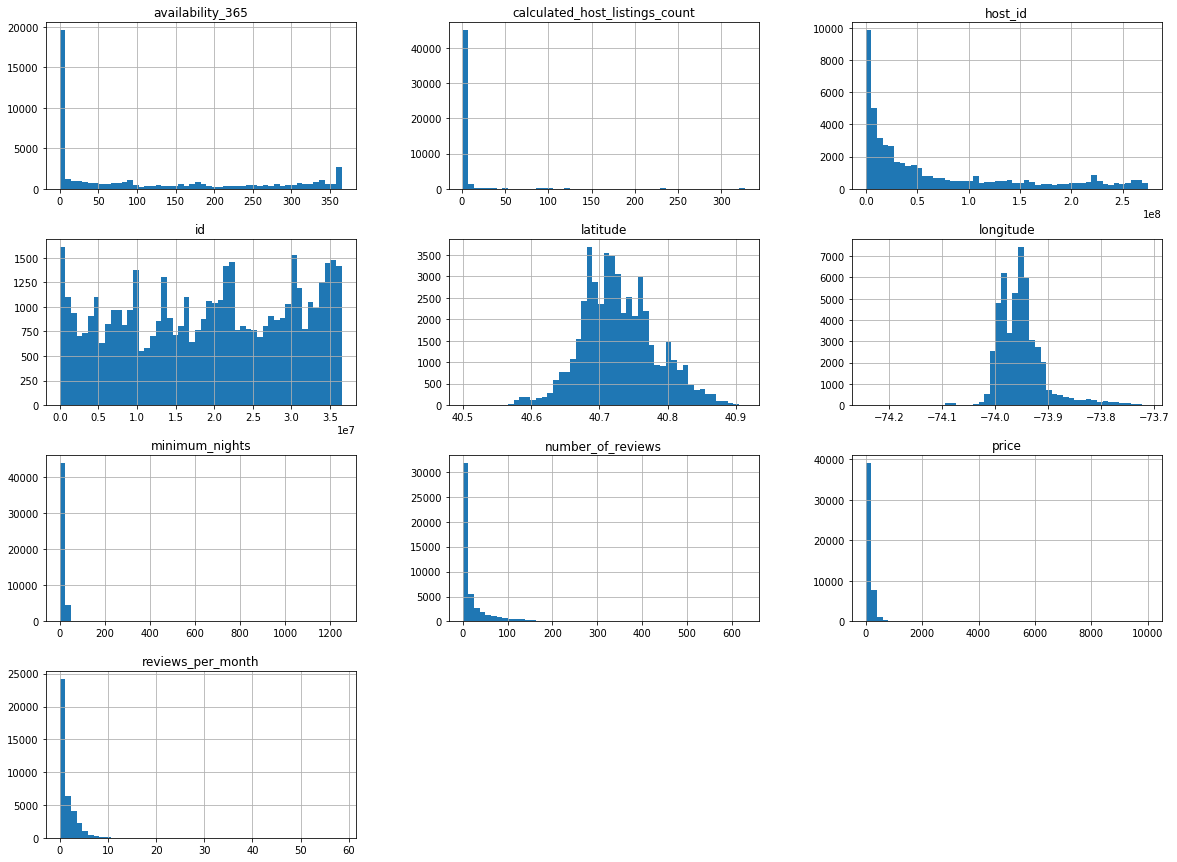

In [11]:
data.hist(bins =50, figsize =(20,15))
plt.show()

In [12]:
drop_cols = ['last_review', 'reviews_per_month', 'host_name','name']

In [13]:
data = data.drop(drop_cols, axis =1)

In [14]:
data.shape

(48895, 12)

In [15]:
data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
id                                48895 non-null int64
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 4.5+ MB


In [17]:
lat_long = data[['latitude', 'longitude']]

In [18]:
data.drop(['latitude','longitude'], axis= 1, inplace = True)

In [19]:
data.neighbourhood_group.value_counts()
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [20]:
np.random.seed(42)
mask = np.random.rand(data.shape[0]) > 0.7

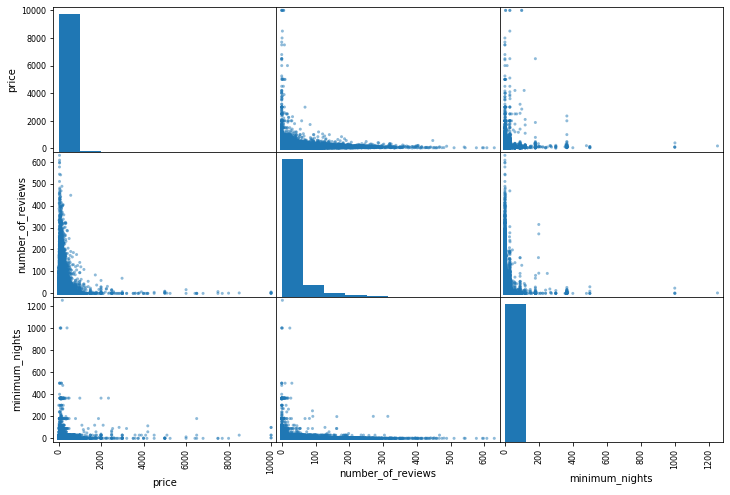

In [21]:
scatter_matrix(data[["price", "number_of_reviews", "minimum_nights"]],
              figsize = (12, 8))
plt.show()

In [22]:
data[mask]
data[~mask]

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
...,...,...,...,...,...,...,...,...,...,...
48888,36484087,274321313,Manhattan,Hell's Kitchen,Private room,125,4,0,1,31
48889,36484363,107716952,Queens,Jamaica,Private room,65,1,0,2,163
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,2,36
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


In [23]:
#LINEAR REGRESSION#

In [24]:
lr = LinearRegression()
lr.fit(data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'] , axis = 1),
       data[mask]['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred = lr.predict(data[~mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis = 1))
print('RMSE = {0:.02f}'.format(
np.sqrt(np.mean((pred - data[~mask]['price'])**2))))

RMSE = 240.66


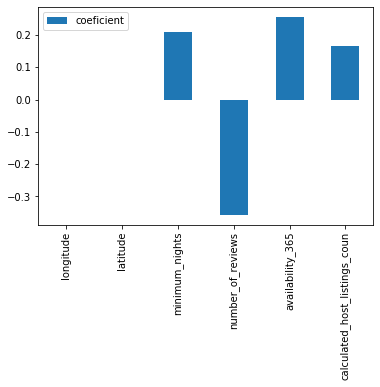

In [26]:
pd.DataFrame(lr.coef_, index = ['longitude', 'latitude', 
                                'minimum_nights', 'number_of_reviews',
                               'availability_365', 'calculated_host_listings_coun'],
             columns = ['coeficient']).plot(kind = 'bar')

In [27]:
data["minimum_price"] = data["price"] * data["minimum_nights"]

In [28]:
#Trying to improve# 0 success

In [29]:
lr = LinearRegression()
lr.fit(data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type', 'minimum_price'] , axis = 1),
       data[mask]['price'])
pred = lr.predict(data[~mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type','minimum_price'], axis = 1))
print('RMSE = {0:.02f}'.format(
np.sqrt(np.mean((pred - data[~mask]['price'])**2))))

RMSE = 240.66


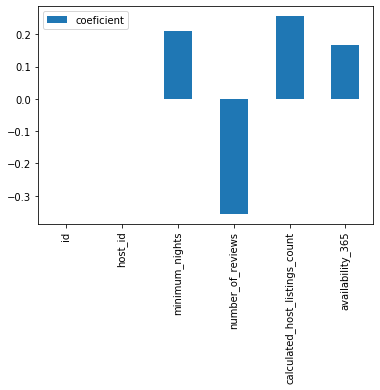

In [30]:
pd.DataFrame(lr.coef_, columns = ['coeficient'],
            index = data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type', 'minimum_price'], axis = 1).columns,
            ).plot(kind='bar')

In [31]:
#Linear reggression by neighbourhood groups#

In [32]:
data.groupby('neighbourhood_group').size()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat = data[["neighbourhood_group"]]
data_cat_1hot = cat_encoder.fit_transform(data_cat)

In [34]:
data_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [35]:
data = pd.concat([data, pd.DataFrame(data_cat_1hot.toarray(),
                                    columns=cat_encoder.categories_)], axis =1)

In [36]:
data

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,minimum_price,"(Bronx,)","(Brooklyn,)","(Manhattan,)","(Queens,)","(Staten Island,)"
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,6,365,149,0.0,1.0,0.0,0.0,0.0
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,225,0.0,0.0,1.0,0.0,0.0
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,1,365,450,0.0,0.0,1.0,0.0,0.0
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,89,0.0,1.0,0.0,0.0,0.0
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,800,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9,140,0.0,1.0,0.0,0.0,0.0
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,2,36,160,0.0,1.0,0.0,0.0,0.0
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,1,27,1150,0.0,0.0,1.0,0.0,0.0
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2,55,0.0,0.0,1.0,0.0,0.0


In [37]:
lr = LinearRegression()
lr.fit(data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1),
       data[mask]['price'])
pred = lr.predict(data[~mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data[~mask]['price'])**2))))

RMSE = 207.35


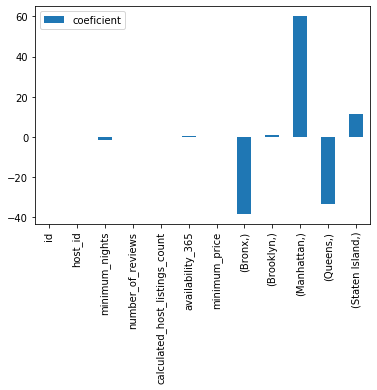

In [38]:
pd.DataFrame(lr.coef_, columns=['coeficient'],
    index=data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1).columns,
             ).plot(kind='bar')

In [39]:
#Decision Tree Model#

In [40]:
data['price_more_than_150'] = data['price'] > 150
data["price_more_than_150"] *=  1

In [41]:
from sklearn.ensemble import BaggingClassifier
data['class'] = data.price_more_than_150

In [42]:
inputs = data.drop('price_more_than_150', axis = 'columns')
target = data['price_more_than_150']

In [43]:
from sklearn.preprocessing import LabelEncoder
le_room = LabelEncoder()

In [44]:
inputs ['room_n'] = le_room.fit_transform(inputs['room_type'])

In [45]:
inputs = inputs.drop([ 'neighbourhood_group', 'neighbourhood', 'room_type', 'class'], axis = 'columns')

In [46]:
inputs

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,minimum_price,"(Bronx,)","(Brooklyn,)","(Manhattan,)","(Queens,)","(Staten Island,)",room_n
0,2539,2787,149,1,9,6,365,149,0.0,1.0,0.0,0.0,0.0,1
1,2595,2845,225,1,45,2,355,225,0.0,0.0,1.0,0.0,0.0,0
2,3647,4632,150,3,0,1,365,450,0.0,0.0,1.0,0.0,0.0,1
3,3831,4869,89,1,270,1,194,89,0.0,1.0,0.0,0.0,0.0,0
4,5022,7192,80,10,9,1,0,800,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,70,2,0,2,9,140,0.0,1.0,0.0,0.0,0.0,1
48891,36485057,6570630,40,4,0,2,36,160,0.0,1.0,0.0,0.0,0.0,1
48892,36485431,23492952,115,10,0,1,27,1150,0.0,0.0,1.0,0.0,0.0,0
48893,36485609,30985759,55,1,0,6,2,55,0.0,0.0,1.0,0.0,0.0,2


In [49]:
np.random.seed(42)
mask = np.random.rand(inputs.shape[0]) < 0.7

In [50]:
base = DecisionTreeClassifier(max_depth=5, splitter='best',
                    max_features='sqrt', criterion='entropy')

# Create Random Forest 
ensemble = BaggingClassifier(base_estimator=base, n_estimators=1000,
                             bootstrap=True)

In [52]:
%%time

ensemble.fit(inputs[mask].drop('room_n', axis=1), inputs[mask]['room_n'])
pred = tree.predict(inputs.drop('room_n', axis=1))

print('Correctly identified on train set - {0:.02%}, on test set - {1:.02%}\n'.format(
    (pred[mask] == inputs[mask]['room_n']).mean(),        # train set
    (pred[~mask] == inputs[~mask]['room_n']).mean()))     # test set

AttributeError: module 'sklearn.tree' has no attribute 'predict'

In [ ]:
data